**Investigate Hotel Business using Data Visualization**

by : Putrini Nur Amalina H.

# Initialization

In [1]:
# import package, dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Read dataset

In [4]:
# read dataset
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mini Project 2 : Analyze hotel business using datviz/hotel_bookings_data.csv')

In [5]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
63571,City Hotel,1,56,2019,April,7,14,0,2,2,0.0,0,No Meal,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,79.20,0,1,Canceled
31328,Resort Hotel,0,83,2018,February,52,23,0,1,2,0.0,0,Breakfast,Kabupaten Bojonegoro,Online TA,TA/TO,0,0,0,3,No Deposit,240.0,NaN,0,Personal,37.80,0,0,Check-Out
81290,City Hotel,0,17,2017,February,49,4,2,2,1,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,NaN,NaN,0,Personal,92.50,0,2,Check-Out
55676,City Hotel,1,205,2018,October,34,19,0,1,3,0.0,0,Breakfast,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,137.70,0,1,Canceled
112062,City Hotel,0,395,2019,July,20,17,0,3,2,0.0,0,Breakfast,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,229.0,NaN,0,Family,112.67,0,0,Check-Out


# Exploratory Data Analysis

In [6]:
# melihat general info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Insight :
* Data terdiri dari 119390 baris dan 29 kolom.
* Terdapat missing value pada kolom `children`,`city`,`agent`,`company`
* Dataset memiliki tipe data int64(16), float64(4), object(9)

In [7]:
# melihat informasi desriptif statistik
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Preprocessing

## Handle null values

In [8]:
#cek jumlah null value pada dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Kolom dengan null value =
1. `city` -> imputation dengan nilai unknown karena asal kota tidak diketahui
2. `children` -> imputation dengan nilai 0 karena menyatakan bahwa tamu tidak memiliki anak
3. `agent` -> imputation dengan nilai 0 sebagai undefined value
4. `company` -> imputation dengan nilai 0 sebagai undefined value

In [9]:
#handle missing value berdasarkan strategi
df['city']=df['city'].fillna('unknown')
df['children']=df['children'].fillna(0)
df['agent']=df['agent'].fillna(0)
df['company']=df['company'].fillna(0)

In [10]:
#cek jumlah null value setelah dihandle
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Setelah di handle, tidak ditemukan adanya null value pada dataset

## Handle undefined values

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [12]:
cats = ['hotel','is_canceled','arrival_date_month','meal','city','market_segment','distribution_channel','deposit_type','customer_type','reservation_status']

In [13]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


Value count kolom is_canceled:
0    75166
1    44224
Name: is_canceled, dtype: int64


Value count kolom arrival_date_month:
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64


Value count kolom meal:
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64


Value count kolom city:
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabu

Pada kolom 'meal' terdapat value Undefined. Rekomendasi untuk di replace dengan value No Meal, karena nilai Undefined memiliki arti yang sama dengan No Meal yaitu tidak makan.

In [14]:
df['meal']=df['meal'].replace(to_replace ='Undefined', value ='No Meal')

In [15]:
# cek value pada kolom 'meal' setelah di handle
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Feature engineering

In [16]:
# make new column : guest and stay_duration
df['guest'] = df['adults'] + df['children'] + df['babies']
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [17]:
# periksa apakah pd kolom guest terdapat value = 0
df[df["guest"] == 0].shape[0]

180

In [18]:
# melakukan drop value pada kolom guest dengan value = 0
df.drop(df.loc[df['guest']==0].index, inplace=True)


# Monthly Hotel Booking Analysis Based on Hotel type

## Create table to show the comparison of booking amount per month for each hotel type

In [19]:
df_task2=df.copy()
df_task2=df.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_task2.columns=['hotel_type','month','unique_year','num_booking']
df_task2

,hotel_type,month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Terdapat beberapa value pada kolom `num_booking` yang berasal dari data selama 3 tahun, sedangkan value lainnya berasal dari data selama 2 tahun. Maka perlu dilakukan normalisasi supaya perbandingannya sesuai dengan menghitung nilai rata rata nya.

## Normalized the data

In [20]:
df_task2['avg_num_booking']=round(df_task2['num_booking']/df_task2['unique_year'])
df_task2

,hotel_type,month,unique_year,num_booking,avg_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


## Sort value order by month

In [21]:
ordered_month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_task2['bulan']=df_task2['month'].str[:3]
df_task2['bulan']=pd.Categorical(df_task2['bulan'], categories=ordered_month, ordered=True)
df_task2

,hotel_type,month,unique_year,num_booking,avg_num_booking,bulan
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


## Generate the plot

The objectives is to show the comparison of hotel bookings between hotel type every month, so the best plot is lineplot.

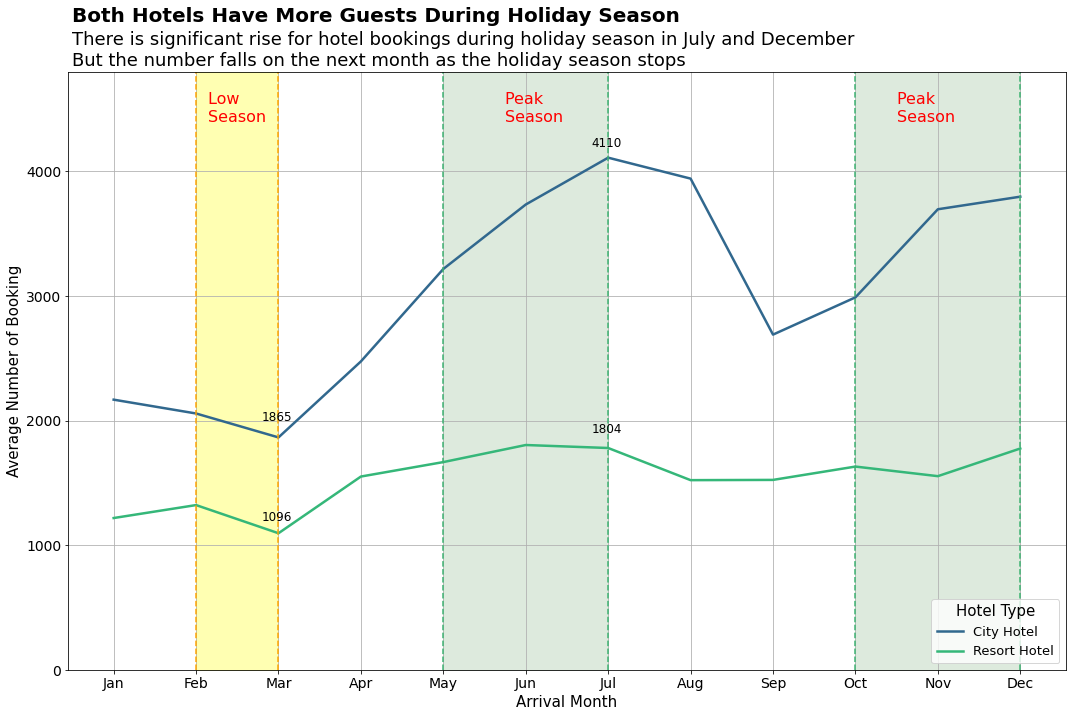

In [22]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.lineplot(x='bulan', y='avg_num_booking', hue='hotel_type', 
            size="hotel_type", sizes=(2.5, 2.5), data=df_task2, palette = 'viridis') # plot awal menggunakan lineplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=14) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}, loc='lower right') # mengatur judul dan ukuran font pada legenda

plt.xlabel('Arrival Month', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Average Number of Booking', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 4800) # membatasi y axis

plt.axvline(4, ls='--', color='mediumseagreen') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='mediumseagreen') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.75, y=4400, s='Peak \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='darkseagreen', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='mediumseagreen') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='mediumseagreen') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Peak \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='darkseagreen', alpha=0.3) # memberikan blok warna pada

plt.axvline(1, ls='--', color='orange') # membuat garis vertikal untuk menghighlight insight
plt.axvline(2, ls='--', color='orange') # membuat garis vertikal untuk menghighlight insight
plt.text(x=1.15, y=4400, s='Low \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(1,3,1), [[4800]], color='yellow', alpha=0.3) # memberikan blok warna pada

plt.text(x=5.8, y=4200, s='4110', fontsize=12, color='black') # menambahkan teks keterangan
plt.text(x=1.8, y=2000, s='1865', fontsize=12, color='black') # menambahkan teks keterangan
plt.text(x=1.8, y=1200, s='1096', fontsize=12, color='black') # menambahkan teks keterangan
plt.text(x=5.8, y=1900, s='1804', fontsize=12, color='black') # menambahkan teks keterangan

plt.text(x=-0.5, y=5200, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=4850, s="There is significant rise for hotel bookings during holiday season in July and December \nBut the number falls on the next month as the holiday season stops ", 
         fontsize=18) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Mini Project 2 : Analyze hotel business using datviz/investigate_hotel_business_v01.png', dpi=200); # menyimpan gambar

## Insights

- Peak season occurs in the middle of the year which is June and July where there is significant increase in average hotel booking for both hotel type. This would probably impacted by the holiday season.
- There is also an increasing amount of hotel bookings in november - December for both hotel type. This also probably impacted by the holiday season which is christmas and new year holiday.
- But the number falls on the next month which is on March and September.
- The lowest rate of the year occurs in March for both hotel type.

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Grouping the stay_duration column

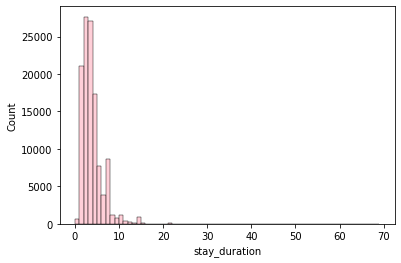

In [23]:
df_task3=df.copy()
sns.histplot(data=df_task3, x="stay_duration", binwidth=1, color="pink")

In [24]:
#Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)
df_task3['stayduration_cats']= np.where(df_task3['stay_duration'] > 21, 21,
                                        np.where(df_task3['stay_duration'] > 14, 15, df_task3['stay_duration']))

## Create table to show the comparison of booking amount based on hotel type, cancel status and duration category

In [25]:
df_task3=df_task3.groupby(['hotel', 'is_canceled', 'stayduration_cats'])['arrival_date_month'].count().reset_index(name='num_bookings')
df_task3

,hotel,is_canceled,stayduration_cats,num_bookings
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
5,City Hotel,0,5,3210
6,City Hotel,0,6,1111
7,City Hotel,0,7,1245
8,City Hotel,0,8,205
9,City Hotel,0,9,119


## Pivot table

In [26]:
# create pivot table to show the number of bookings where its not cancelled and cancelled based on hotel type and duration category
df_task3 = df_task3.pivot_table(index=['hotel', 'stayduration_cats'], columns='is_canceled', values='num_bookings').reset_index()
df_task3

is_canceled,hotel,stayduration_cats,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,205,176
9,City Hotel,9,119,93


## Create column to show the cancelled booking rate based on duration category



In [27]:
# Create pct column to show the percentage of cancelled booking
df_task3['pct']=round(df_task3[1]*100/(df_task3[0]+df_task3[1]),2)
df_task3

is_canceled,hotel,stayduration_cats,0,1,pct
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


## Generate the plot

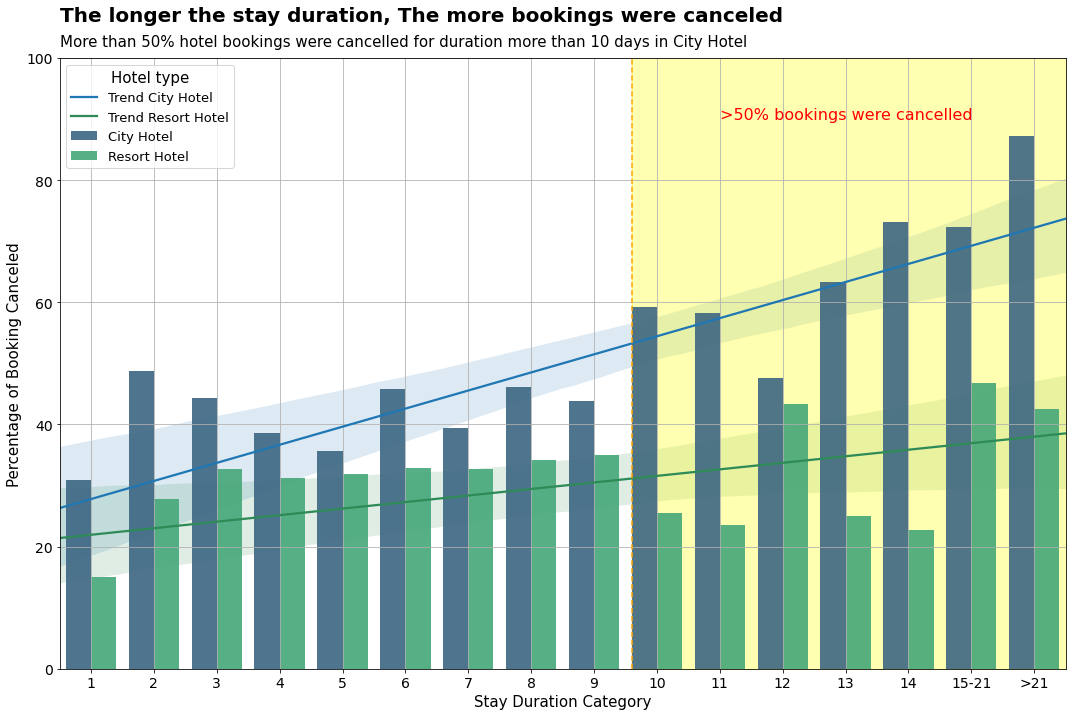

In [28]:
# buat figure
plt.figure(figsize=(15,10))
# buat diagram barplot dgn hue tipe hotel
sns.barplot(x='stayduration_cats',y='pct',hue='hotel',data=df_task3, alpha=0.9, palette = 'viridis')
# buat diagram regresi linear untuk melihat trend antar tipe hotel
sns.regplot(x='stayduration_cats',y='pct',data=df_task3[df_task3['hotel']=='City Hotel'],scatter=False, label='Trend City Hotel')
sns.regplot(x='stayduration_cats',y='pct',data=df_task3[df_task3['hotel']=='Resort Hotel'],scatter=False, label='Trend Resort Hotel', color='seagreen')
# perbesar ukuran x-y axis label
plt.tick_params(axis='both',which='major',labelsize=14)
# tambah gridline
plt.grid()
# buat legend
plt.legend(title='Hotel type', title_fontsize=15, prop={'size':13})
# atur title pada x-y axis
plt.xlabel('Stay Duration Category', fontsize=15)
plt.ylabel('Percentage of Booking Canceled', fontsize=15)
# mengubah xticks label
plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"])
# mengatur batas x-y axis
plt.ylim (0,100)
plt.xlim (0.5, 16.5)
# membuat garis untuk highlight insight
plt.axvline(9.6, ls='--', color='orange')
plt.axvline(17, ls='--', color='orange')
plt.text (x=11, y=90, s='>50% bookings were cancelled', fontsize=16, color='red')
plt.stackplot(np.arange(9.6,17,1), [[100]], color='yellow', alpha=0.3)
# membuat judul dan deskripsi
plt.text (x=0.5,y=106, s='The longer the stay duration, The more bookings were canceled', fontsize=20, fontweight='bold')
plt.text (x=0.5,y=102, s='More than 50% hotel bookings were cancelled for duration more than 10 days in City Hotel', fontsize=15, fontweight='light')
# mengatur layout agar tidak terpotong
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Mini Project 2 : Analyze hotel business using datviz/investigate_hotel_business_v02.png', dpi=200); # menyimpan gambar

## Insights

- Both hotel types have positive linear relation for stay duration and cancelled booking. But the relation is more significant for city hotel type.
- City hotel type have average more than 50% probability to be cancelled when the stay duration is more than 10 days

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Grouping the lead time column

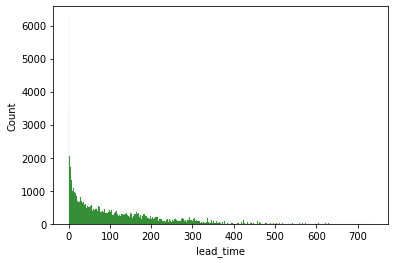

In [29]:
df_task4=df.copy()
sns.histplot(data=df_task4,x='lead_time', binwidth=1, color='green')

Distribusi data terlihat positively skewed maka perlu dilakukan pengelompokan data per 30 hari

In [30]:
# lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
df_task4['lead_times'] = np.where(df_task4['lead_time'] > 400, 401, df_task4['lead_time']) 

# grouping lead_time untuk setiap kelipatan 30
bins = list(np.arange(0,max(df_task4['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df_task4['lead_time_group'] = pd.cut(df_task4['lead_times'],bins=bins, include_lowest=True, labels=labels) 

In [31]:
df_task4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,stay_duration,lead_times,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,342,330-360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,401,390-420
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,7,0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,13,0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,14,0-30


## Create table to show the comparison of booking amount based on hotel type, cancellation status, and lead time group

In [32]:
df_task4=df_task4.groupby(['hotel','is_canceled','lead_time_group'])['arrival_date_month'].agg('count').reset_index(name='num_booking')

In [33]:
df_pivot2=df_task4.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_booking').reset_index()
df_pivot2

is_canceled,hotel,lead_time_group,0,1
0,City Hotel,0-30,18060,5184
1,City Hotel,30-60,7266,4608
2,City Hotel,60-90,5210,3692
3,City Hotel,90-120,3956,3486
4,City Hotel,120-150,3064,2542
5,City Hotel,150-180,2442,2716
6,City Hotel,180-210,1800,1793
7,City Hotel,210-240,1224,1280
8,City Hotel,240-270,880,1237
9,City Hotel,270-300,660,1859


## Create column to show the cancelled booking rate based on lead time group 

In [34]:
df_pivot2['pct_leadtime']=round(df_pivot2[1]*100/(df_pivot2[0]+df_pivot2[1]),2)
df_pivot2

is_canceled,hotel,lead_time_group,0,1,pct_leadtime
0,City Hotel,0-30,18060,5184,22.30
1,City Hotel,30-60,7266,4608,38.81
2,City Hotel,60-90,5210,3692,41.47
3,City Hotel,90-120,3956,3486,46.84
4,City Hotel,120-150,3064,2542,45.34
5,City Hotel,150-180,2442,2716,52.66
6,City Hotel,180-210,1800,1793,49.90
7,City Hotel,210-240,1224,1280,51.12
8,City Hotel,240-270,880,1237,58.43
9,City Hotel,270-300,660,1859,73.80


## Generate the plot

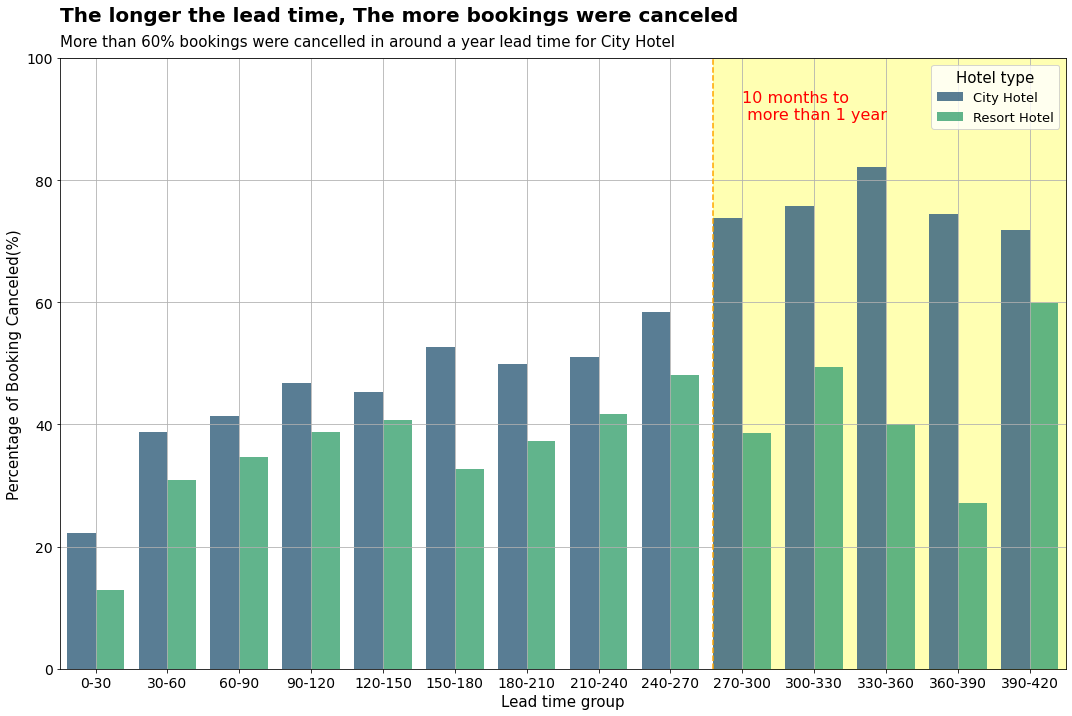

In [35]:
# buat figure
plt.figure(figsize=(15,10))
# buat diagram barplot dgn hue tipe hotel
sns.barplot(x='lead_time_group',y='pct_leadtime',hue='hotel',data=df_pivot2, alpha=0.85, palette = 'viridis')
# perbesar ukuran x-y axis label
plt.tick_params(axis='both',which='major',labelsize=14)
# tambah gridline
plt.grid()
# buat legend
plt.legend(title='Hotel type', title_fontsize=15, prop={'size':13})
# atur title pada x-y axis
plt.xlabel('Lead time group', fontsize=15)
plt.ylabel('Percentage of Booking Canceled(%)', fontsize=15)
# mengatur batas x-y axis
plt.ylim (0,100)
plt.xlim (-0.5, 13.5)
# membuat judul dan deskripsi
plt.text (x=-0.5,y=106, s='The longer the lead time, The more bookings were canceled', fontsize=20, fontweight='bold')
plt.text (x=-0.5,y=102, s='More than 60% bookings were cancelled in around a year lead time for City Hotel', fontsize=15, fontweight='light')
# membuat garis untuk highlight insight
plt.axvline(8.6, ls='--', color='orange')
plt.axvline(14, ls='--', color='orange')
plt.text (x=9, y=90, s='10 months to \n more than 1 year', fontsize=16, color='red')
plt.stackplot(np.arange(8.6,15,1), [[100]], color='yellow', alpha=0.3)

# mengatur layout agar tidak terpotong
plt.tight_layout()

plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/Mini Project 2 : Analyze hotel business using datviz/investigate_hotel_business_v03.png', dpi=200); # menyimpan gambar

## Insights

- There is positive linear relation between cancelled booking and lead time. The more longer the lead time, the bigger chance the booking being cancelled.
- City type hotel with lead time more than 270 days (9 months) have 60% probability to be cancelled.